In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
# Fetch LFW dataset with minimum faces per person = 40
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)

In [3]:
# Extracting data and target labels
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_samples, n_features = X.shape
n_classes = len(target_names)

# Print dataset statistics
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)
print("Number of classes: %d" % n_classes)

Number of samples: 1777
Number of features: 1850
Number of classes: 17


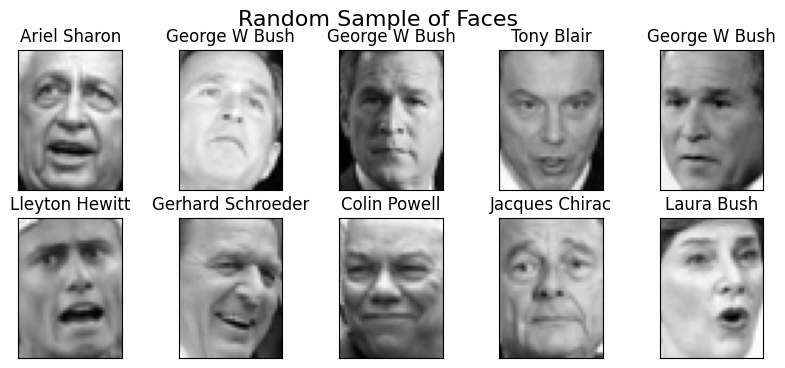

In [4]:
# Visualizing the dataset
# Visualize a random sample of faces
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # plt.imshow(X[i].reshape((lfw_people.images.shape[1], lfw_people.images.shape[2])))
    plt.imshow(X[i].reshape((lfw_people.images.shape[1], lfw_people.images.shape[2])), cmap=plt.cm.gray)
    plt.title(target_names[y[i]], size=12)
    plt.xticks(())
    plt.yticks(())
plt.suptitle("Random Sample of Faces", size=16)
plt.show()

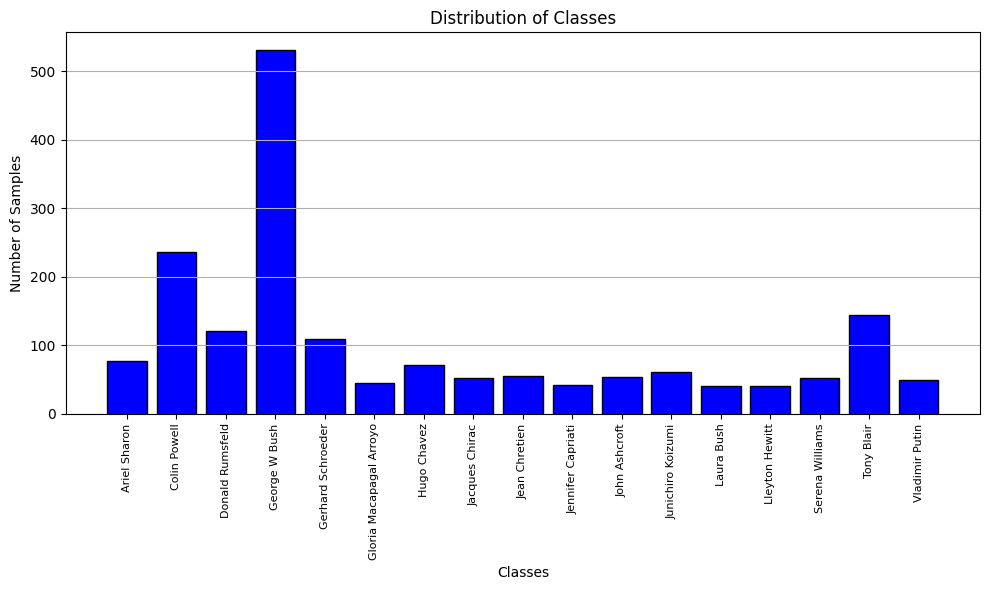

In [8]:
hist, _ = np.histogram(y, bins=n_classes)

# Plotting the distribution of classes with centered class names
plt.figure(figsize=(10, 6))
bin_centers = np.arange(n_classes)
plt.bar(bin_centers, hist, color='blue', edgecolor='black')
plt.xticks(bin_centers, target_names, rotation=90, ha='center', fontsize=8)
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

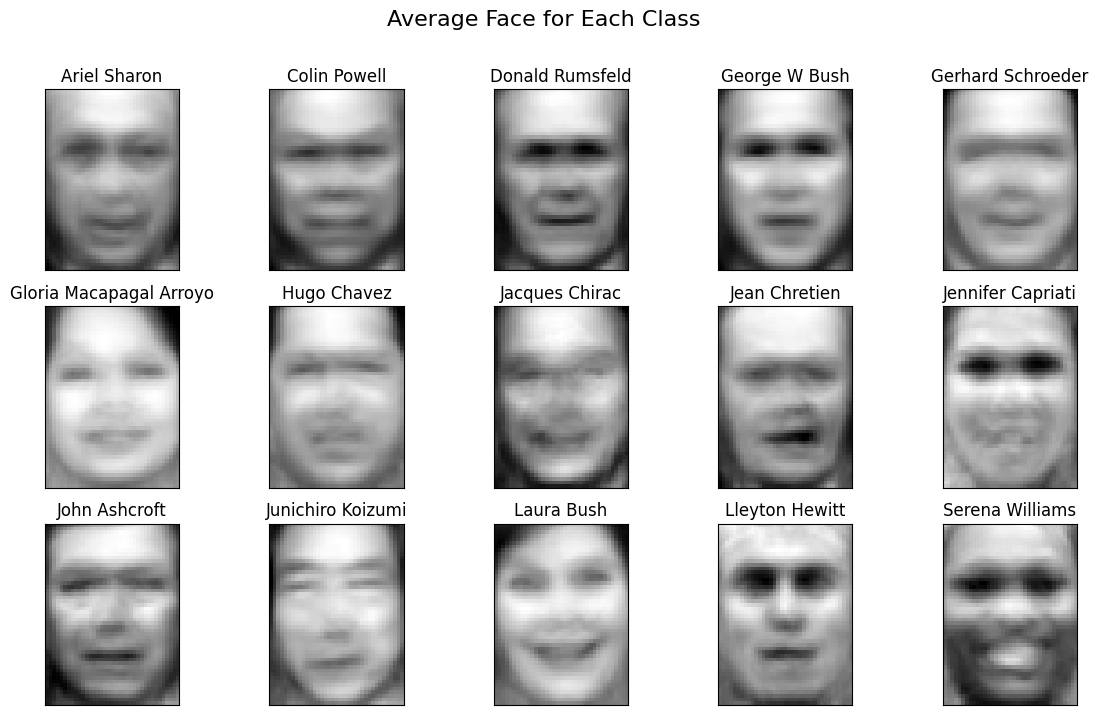

In [9]:
# Plotting the average face for each class
plt.figure(figsize=(14, 8))
for i in range(min(n_classes, 15)):
    class_images = X[y == i]
    average_face = np.mean(class_images, axis=0)
    plt.subplot(3, 5, i + 1)
    plt.imshow(average_face.reshape((lfw_people.images.shape[1], lfw_people.images.shape[2])), cmap=plt.cm.gray)
    plt.title(target_names[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle("Average Face for Each Class", size=16)
plt.show()

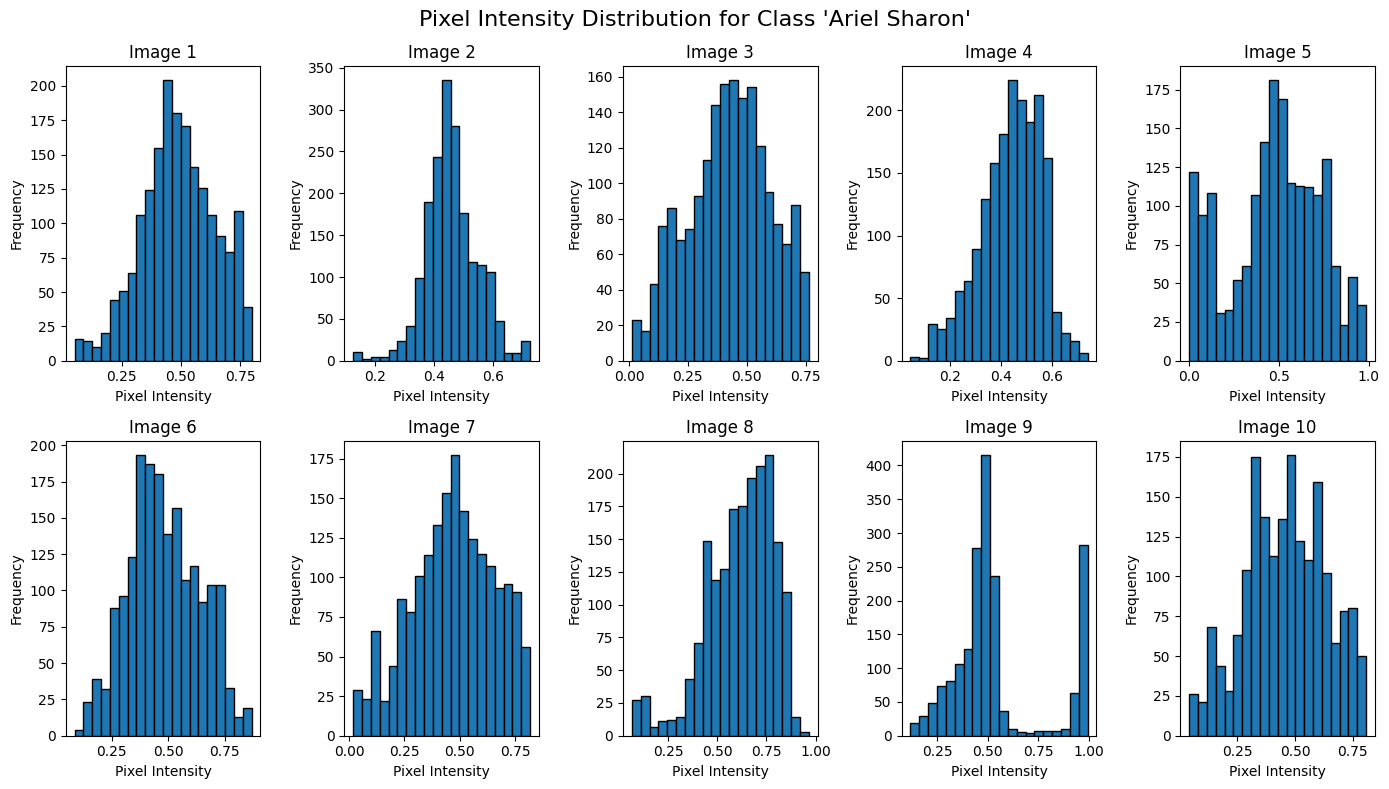

In [10]:
# Choose a specific class for histogram visualization
class_index = 0  # You can change this to visualize other classes
class_images = X[y == class_index]

# Plotting histograms to visualize pixel intensity distribution for a specific class
plt.figure(figsize=(14, 8))
for i in range(min(10, len(class_images))):
    plt.subplot(2, 5, i + 1)
    plt.hist(class_images[i], bins=20, edgecolor='black')
    plt.title(f"Image {i + 1}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.suptitle(f"Pixel Intensity Distribution for Class '{target_names[class_index]}'", size=16)
plt.tight_layout()
plt.show()

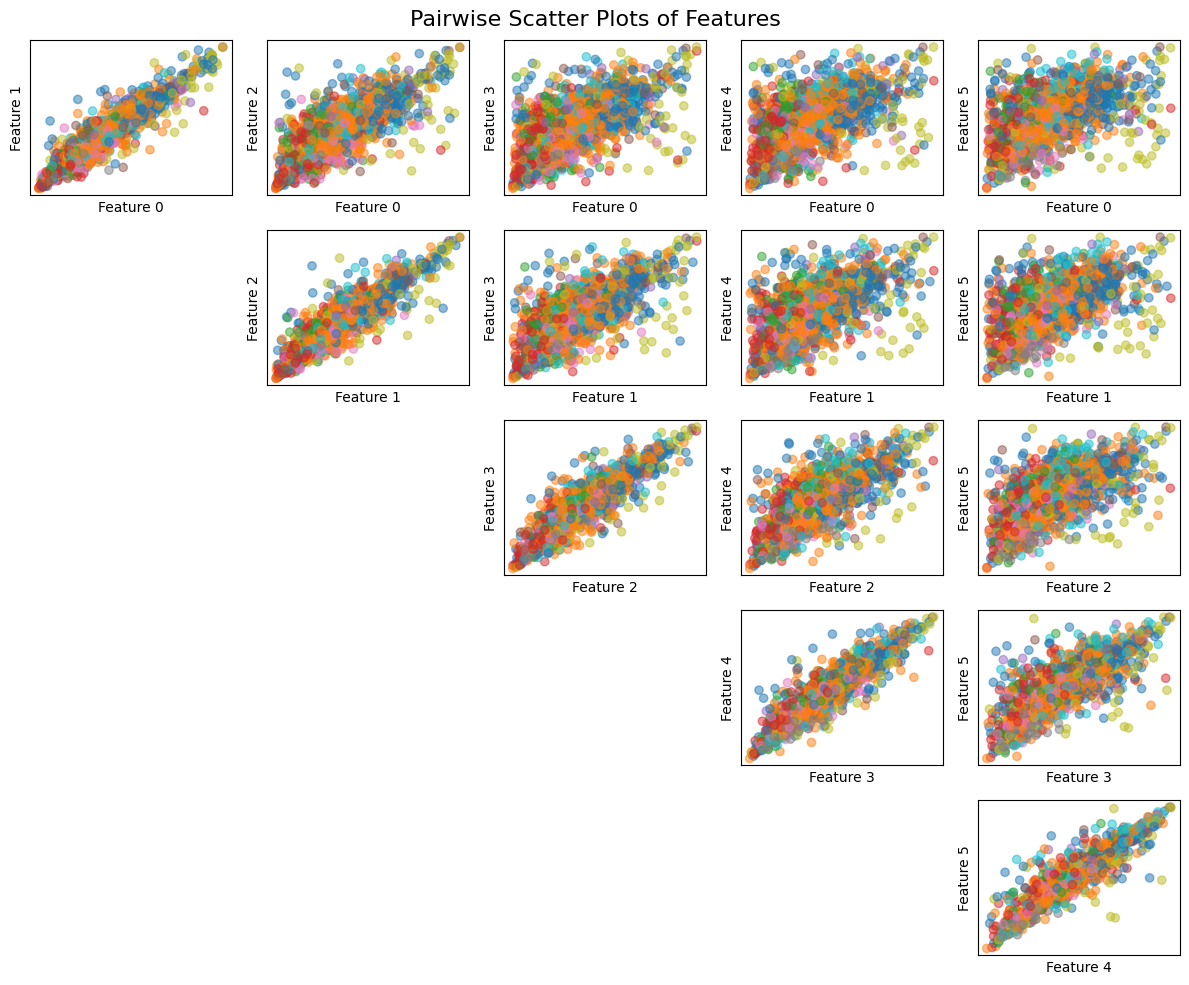

In [11]:
# Plotting pairwise scatter plots to examine relationships between pairs of features
plt.figure(figsize=(12, 10))
for i in range(5):
    for j in range(i+1, 6):
        plt.subplot(5, 5, i*5 + j)
        plt.scatter(X[:, i], X[:, j], c=y, cmap='tab10', alpha=0.5)
        plt.xlabel(f'Feature {i}')
        plt.ylabel(f'Feature {j}')
        plt.xticks(())
        plt.yticks(())
plt.suptitle('Pairwise Scatter Plots of Features', size=16)
plt.tight_layout()
plt.show()

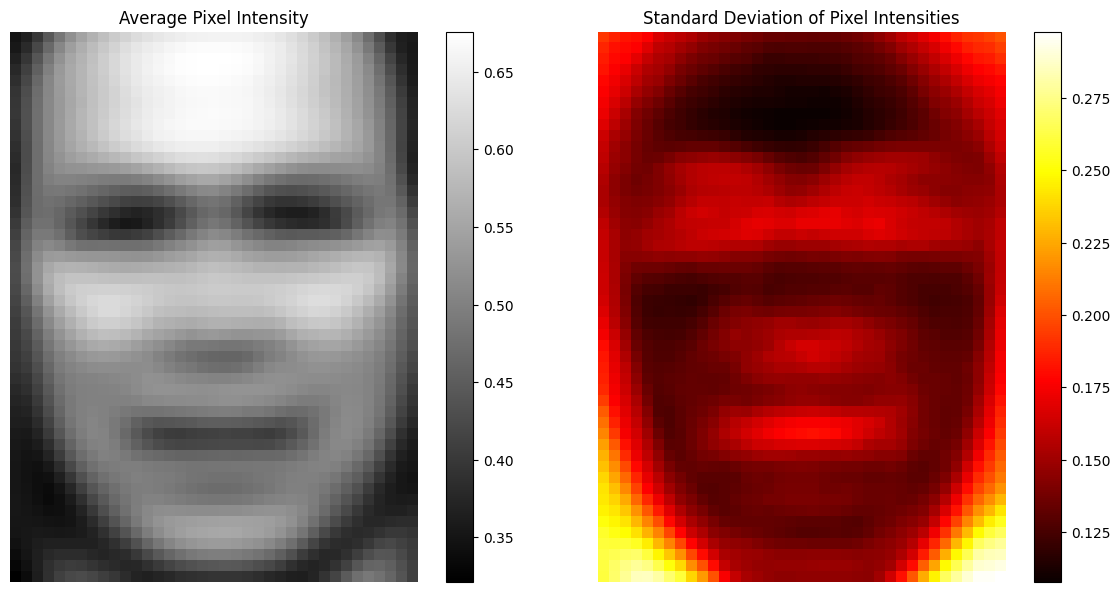

In [13]:
# Calculate average pixel intensity across all images
average_intensity = np.mean(X, axis=0)

# Calculate standard deviation of pixel intensities
std_intensity = np.std(X, axis=0)

# Plotting average pixel intensity and standard deviation side by side
plt.figure(figsize=(12, 6))

# Plotting average pixel intensity
plt.subplot(1, 2, 1)
plt.imshow(average_intensity.reshape((lfw_people.images.shape[1], lfw_people.images.shape[2])), cmap='gray')
plt.title('Average Pixel Intensity')
plt.axis('off')
plt.colorbar()

# Plotting standard deviation of pixel intensities
plt.subplot(1, 2, 2)
plt.imshow(std_intensity.reshape((lfw_people.images.shape[1], lfw_people.images.shape[2])), cmap='hot')
plt.title('Standard Deviation of Pixel Intensities')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()